In [3]:
ACC = pd.read_csv("ACCQ1.csv", encoding="big5", chunksize=30)
ACC = ACC.get_chunk(500000000)#27,979,053x38
ACC.columns = ["交寄局號","特約","頁碼","段號","郵件狀態","交寄日期","交寄時間","責任局號","部門別","收件人付費狀態","總件數","基本郵件種類","細分","郵件內容","代收貨價","回執","存證","收寄處理方式","附寄","附寄種類","保價","掛號","速度","報值","國內/國際","特約戶繳費","郵件種類","寄達遞郵遞區號","計費","本頁件數","本段重量","本段件數","掛號碼起號","掛號碼迄號","便利箱袋","箱袋狀態","收寄年月","收寄月份"]
ACC.size

/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:67: DtypeWarning: Columns (12,27) have mixed types. Specify dtype option on import or set low_memory=False.
  coro.send(None)


1063204014

In [2]:
import pandas as pd
import keras
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer
from tqdm import tqdm
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
#import matplotlib.pyplot as plt
#import seaborn as sns
pd.set_option("display.max_columns",50)#設定pandas最多顯示50

Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
ACCQ1 = pd.read_csv("ACCQ1.csv", encoding="big5", names=["交寄局號","特約","頁碼","段號","郵件狀態","交寄日期","交寄時間","責任局號","部門別","收件人付費狀態","總件數","基本郵件種類","細分","郵件內容","代收貨價","回執","存證","收寄處理方式","附寄","附寄種類","保價","掛號","速度","報值","國內/國際","特約戶繳費","郵件種類","寄達遞郵遞區號","計費","本頁件數","本段重量","本段件數","掛號碼起號","掛號碼迄號","便利箱袋","箱袋狀態","收寄年月","收寄月份"])
ACCQ2 = pd.read_csv("ACCQ2.csv", encoding="big5", names=["交寄局號","特約","頁碼","段號","郵件狀態","交寄日期","交寄時間","責任局號","部門別","收件人付費狀態","總件數","基本郵件種類","細分","郵件內容","代收貨價","回執","存證","收寄處理方式","附寄","附寄種類","保價","掛號","速度","報值","國內/國際","特約戶繳費","郵件種類","寄達遞郵遞區號","計費","本頁件數","本段重量","本段件數","掛號碼起號","掛號碼迄號","便利箱袋","箱袋狀態","收寄年月","收寄月份"])
ACCQ3 = pd.read_csv("ACCQ3.csv", encoding="big5", names=["交寄局號","特約","頁碼","段號","郵件狀態","交寄日期","交寄時間","責任局號","部門別","收件人付費狀態","總件數","基本郵件種類","細分","郵件內容","代收貨價","回執","存證","收寄處理方式","附寄","附寄種類","保價","掛號","速度","報值","國內/國際","特約戶繳費","郵件種類","寄達遞郵遞區號","計費","本頁件數","本段重量","本段件數","掛號碼起號","掛號碼迄號","便利箱袋","箱袋狀態","收寄年月","收寄月份"])
ACCQ4 = pd.read_csv("ACCQ4.csv", encoding="big5", names=["交寄局號","特約","頁碼","段號","郵件狀態","交寄日期","交寄時間","責任局號","部門別","收件人付費狀態","總件數","基本郵件種類","細分","郵件內容","代收貨價","回執","存證","收寄處理方式","附寄","附寄種類","保價","掛號","速度","報值","國內/國際","特約戶繳費","郵件種類","寄達遞郵遞區號","計費","本頁件數","本段重量","本段件數","掛號碼起號","掛號碼迄號","便利箱袋","箱袋狀態","收寄年月","收寄月份"])

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (12,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [57]:
def processing(ACC,Q):
    #只篩要的欄位
    ACC_frame = ACC[["交寄日期","交寄時間","責任局號",'基本郵件種類','代收貨價','回執','存證','收寄處理方式','附寄','保價','掛號','速度','報值','本段重量','掛號碼起號']]
    del ACC
    #只篩掛號
    ACC_frame = ACC_frame[ACC_frame.掛號 == 1]
    ACC_frame = ACC_frame.drop('掛號',axis=1)
    #合併狀態欄
    return_once =pd.read_csv("mail_return_once"+Q+".csv",encoding = 'utf-8-sig')
    return_twice =pd.read_csv("mail_return_twice"+Q+".csv",encoding = 'utf-8-sig')
    success =pd.read_csv("mail_pure_success"+Q+".csv",encoding = 'utf-8-sig')
    print('1')
    #轉換為list,set比較相同列
    postage = ACC_frame['掛號碼起號'].tolist()
    return_once = return_once['掛號號碼'].tolist()
    return_twice = return_twice['掛號號碼'].tolist()
    success = success['掛號號碼'].tolist()
    return_once = list(set(postage) & set(return_once))
    return_twice = list(set(postage) & set(return_twice))
    success = list(set(postage) & set(success))
    print('2')
    #有共同出現的抓出來
    return_once_ACC = ACC_frame[ACC_frame['掛號碼起號'].isin(return_once)]
    return_twice_ACC = ACC_frame[ACC_frame['掛號碼起號'].isin(return_twice)]
    success_ACC = ACC_frame[ACC_frame['掛號碼起號'].isin(success)]
    print('3')
    #狀態list
    return_once_list = [1]*len(return_once_ACC['掛號碼起號'])
    return_twice_list = [2]*len(return_twice_ACC['掛號碼起號'])
    success_list = [0]*len(success_ACC['掛號碼起號'])

    #合併狀態list
    return_once_ACC['狀態'] = return_once_list
    return_twice_ACC['狀態'] = return_twice_list
    success_ACC['狀態'] = success_list

    #合併dataframe
    ACC_frame = success_ACC.append(return_once_ACC)
    ACC_frame = ACC_frame.append(return_twice_ACC)

    #丟掉掛號欄
    ACC_frame = ACC_frame.drop('掛號碼起號',axis=1)

    #變數delete
    del return_once
    del return_twice
    del success
    del return_once_ACC
    del return_twice_ACC
    del success_ACC
    del return_once_list
    del return_twice_list
    del success_list
    del postage
    print('5')
    #補空值
    ACC_frame['責任局號'].fillna(value=0, inplace=True)
    ACC_frame['基本郵件種類'].fillna(value=4, inplace=True)
    #ACC_frame['細分'].fillna(value=0, inplace=True)
    #ACC_frame['郵件內容'].fillna(value=2, inplace=True)
    ACC_frame['代收貨價'].fillna(value=0, inplace=True)
    ACC_frame['回執'].fillna(value=0, inplace=True)
    ACC_frame['存證'].fillna(value=0, inplace=True)
    ACC_frame['收寄處理方式'].fillna(value=1, inplace=True)
    ACC_frame['附寄'].fillna(value=0, inplace=True)
    ACC_frame['保價'].fillna(value=0, inplace=True)
    ACC_frame['速度'].fillna(value=0, inplace=True)
    ACC_frame['報值'].fillna(value=0, inplace=True)
    #ACC_frame['國內/國際'].fillna(value=0, inplace=True)
    #ACC_frame['計費'].fillna(value=1, inplace=True)
    ACC_frame['本段重量'].fillna(value=1, inplace=True)
    #ACC_frame['掛號碼起號'].fillna(value=0, inplace=True)
    #ACC_frame['掛號碼迄號'].fillna(value=0, inplace=True)
    #ACC_frame['便利箱袋'].fillna(value=68, inplace=True)
    #ACC_frame['收寄年月'].fillna(value=0, inplace=True)
    
    #函件(1)、包裹(2)、快捷(3)   one-hot
    ACC_frame[['函件','包裹','快捷']] = pd.get_dummies(ACC_frame['基本郵件種類'])
    ACC_frame = ACC_frame.drop('基本郵件種類',axis=1)
    print('6')
    #rename
    #ACC_frame = ACC_frame.rename(columns={'1' : '函件'})
    #ACC_frame = ACC_frame.rename(columns={'2' : '包裹'})
    #ACC_frame = ACC_frame.rename(columns={'3' : '快捷'})
    
    #重量log transform,e為底
    y = ACC_frame[['本段重量']].values #returns a numpy array
    transformer = FunctionTransformer(np.log1p, validate=True)
    y_transform = transformer.transform(y)
    y_transform.tolist()
    ACC_frame['weight'] = y_transform
    ACC_frame = ACC_frame.drop('本段重量',axis=1)

    del y
    
    #收寄處理方式 one-hot
    ACC_frame[['零星','大小宗','彙計']] = pd.get_dummies(ACC_frame['收寄處理方式'])
    ACC_frame = ACC_frame.drop('收寄處理方式',axis=1)
    print('7')
    #回執 one-hot
    ACC_frame['回執'] = ACC_frame['回執']+1
    ACC_frame[['無回執','普通回執','掛號回執','限時掛號回執','快捷回執']] = pd.get_dummies(ACC_frame['回執'])
    ACC_frame = ACC_frame.drop('回執',axis=1)
    
    #報值 one-hot
    ACC_frame['報值'] = ACC_frame['報值']+1
    ACC_frame[['無報值','報值','法定紙幣報值','非法定紙幣報值',]] = pd.get_dummies(ACC_frame['報值'])
    ACC_frame = ACC_frame.drop('報值',axis=1)
    
    #責任局號取3碼,get dummies
    postage = ACC_frame['責任局號'].astype(str)
    ACC_frame['責任局號'] = postage.str.slice(0,3)
    ACC_frame[['台北市中正區','基隆市仁愛區','新北市板橋區','新北市三重區','宜蘭市','新竹市','桃園區','苗栗市','台中市中區','彰化市','南投市','嘉義市西區','雲林縣斗六市','台南市北區','高雄市新興區','馬公市','屏東市','台東市','花蓮市']] = pd.get_dummies(ACC_frame['責任局號'])

    ACC函件 = ACC_frame[ACC_frame.函件 == 1]
    ACC包裹 = ACC_frame[ACC_frame.包裹 == 1]
    ACC快捷 = ACC_frame[ACC_frame.快捷 == 1]
    print('9')
    #decision tree
    y = ACC_frame['狀態'].values
    x = ACC_frame[['代收貨價','存證','附寄','保價','速度','函件','包裹','快捷','weight','零星','大小宗','彙計','無回執','普通回執','掛號回執','限時掛號回執','快捷回執','無報值','法定紙幣報值','非法定紙幣報值','台北市中正區','基隆市仁愛區','新北市板橋區','新北市三重區','宜蘭市','新竹市','桃園區','苗栗市','台中市中區','彰化市','南投市','嘉義市西區','雲林縣斗六市','台南市北區','高雄市新興區','馬公市','屏東市','台東市','花蓮市']].values

    # 切分訓練與測試資料
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

    # 建立分類器
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
    post_clf = clf.fit(x_train, y_train)

    # 預測
    y_test_predicted = post_clf.predict(x_test)

    post_clf.score(x_test,y_test)
    print(Q)
    print(classification_report(y_test,y_test_predicted))
    
    accuracy = metrics.accuracy_score(y_test, y_test_predicted)
    print(accuracy)
    
    l = [accuracy]
    d = {"準確度" : l}
    df1 = pd.DataFrame(d)
    df1.to_csv("accuracy"+Q+".csv",encoding='utf-8')
    
    count = ACC函件['狀態'].value_counts()
    count = pd.DataFrame({'狀態':count.index, '數量':count.values})
    count.to_csv("函件"+Q+".csv",encoding='utf-8')
    
    count = ACC包裹['狀態'].value_counts()
    count = pd.DataFrame({'狀態':count.index, '數量':count.values})
    count.to_csv("包裹"+Q+".csv",encoding='utf-8')
    
    count = ACC快捷['狀態'].value_counts()
    count = pd.DataFrame({'狀態':count.index, '數量':count.values})
    count.to_csv("快捷"+Q+".csv",encoding='utf-8')
    return(accuracy)

In [4]:
#只篩要的欄位
ACC_frame = ACC[["交寄日期","交寄時間","責任局號",'基本郵件種類','代收貨價','回執','存證','收寄處理方式','附寄','保價','掛號','速度','報值','本段重量','掛號碼起號']]
del ACC

In [5]:
#只篩掛號
ACC_frame = ACC_frame[ACC_frame.掛號 == 1]
ACC_frame = ACC_frame.drop('掛號',axis=1)

In [6]:
Q = 'Q1'
#合併狀態欄
return_once =pd.read_csv("mail_return_once"+Q+".csv",encoding = 'utf-8-sig')
return_twice =pd.read_csv("mail_return_twice"+Q+".csv",encoding = 'utf-8-sig')
success =pd.read_csv("mail_pure_success"+Q+".csv",encoding = 'utf-8-sig')

#轉換為list,set比較相同列
postage = ACC_frame['掛號碼起號'].tolist()
return_once = return_once['掛號號碼'].tolist()
return_twice = return_twice['掛號號碼'].tolist()
success = success['掛號號碼'].tolist()
return_once = list(set(postage) & set(return_once))
return_twice = list(set(postage) & set(return_twice))
success = list(set(postage) & set(success))

#有共同出現的抓出來
return_once_ACC = ACC_frame[ACC_frame['掛號碼起號'].isin(return_once)]
return_twice_ACC = ACC_frame[ACC_frame['掛號碼起號'].isin(return_twice)]
success_ACC = ACC_frame[ACC_frame['掛號碼起號'].isin(success)]

#狀態list
return_once_list = [1]*len(return_once_ACC['掛號碼起號'])
return_twice_list = [2]*len(return_twice_ACC['掛號碼起號'])
success_list = [0]*len(success_ACC['掛號碼起號'])

#合併狀態list
return_once_ACC['投遞失敗次數'] = return_once_list
return_twice_ACC['投遞失敗次數'] = return_twice_list
success_ACC['投遞失敗次數'] = success_list

#合併dataframe
ACC_frame = success_ACC.append(return_once_ACC)
ACC_frame = ACC_frame.append(return_twice_ACC)

#丟掉掛號欄
#ACC_frame = ACC_frame.drop('掛號碼起號',axis=1)

#變數delete
# del return_once
# del return_twice
# del success
# del return_once_ACC
# del return_twice_ACC
# del success_ACC
# del return_once_list
# del return_twice_list
# del success_list
# del postage

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarni

In [7]:
ACC_frame.sample(n=5)

,交寄日期,交寄時間,責任局號,基本郵件種類,代收貨價,回執,存證,收寄處理方式,附寄,保價,速度,報值,本段重量,掛號碼起號,投遞失敗次數
16591890,1070226,121319,100999,1,0,2,0,1,0,0,1,0,10,97776110015820105008,2
8080894,1070125,93326,300999,1,0,0,0,1,0,0,1,2,5,90519830001121600004,0
5094331,1070116,113800,200999,1,0,1,1,1,0,0,0,0,9,95829420003910324001,2
288044,1070102,145821,241999,1,0,0,0,1,0,0,0,2,8,90403424102811201008,0
10625887,1070201,151704,400999,1,0,0,0,1,0,0,0,0,50,98217940002310115005,2


In [8]:
#補空值
ACC_frame['責任局號'].fillna(value=0, inplace=True)
ACC_frame['基本郵件種類'].fillna(value=4, inplace=True)
#ACC_frame['細分'].fillna(value=0, inplace=True)
#ACC_frame['郵件內容'].fillna(value=2, inplace=True)
ACC_frame['代收貨價'].fillna(value=0, inplace=True)
ACC_frame['回執'].fillna(value=0, inplace=True)
ACC_frame['存證'].fillna(value=0, inplace=True)
ACC_frame['收寄處理方式'].fillna(value=1, inplace=True)
ACC_frame['附寄'].fillna(value=0, inplace=True)
ACC_frame['保價'].fillna(value=0, inplace=True)
ACC_frame['速度'].fillna(value=0, inplace=True)
ACC_frame['報值'].fillna(value=0, inplace=True)
#ACC_frame['國內/國際'].fillna(value=0, inplace=True)
#ACC_frame['計費'].fillna(value=1, inplace=True)
ACC_frame['本段重量'].fillna(value=1, inplace=True)
#ACC_frame['掛號碼起號'].fillna(value=0, inplace=True)
#ACC_frame['掛號碼迄號'].fillna(value=0, inplace=True)
#ACC_frame['便利箱袋'].fillna(value=68, inplace=True)
#ACC_frame['收寄年月'].fillna(value=0, inplace=True)

In [99]:
#合併12.13 種類 細分 ,再drop
#ACC_frame['細分'].replace(0, 'V',inplace=True)
#ACC_frame['content'] = ACC_frame['基本郵件種類'].map(str)+ACC_frame['細分'].map(str)
#ACC_frame = ACC_frame.drop('基本郵件種類',axis=1)
#ACC_frame = ACC_frame.drop('細分',axis=1)

In [9]:
#函件(1)、包裹(2)、快捷(3)   one-hot
ACC_frame[['函件','包裹','快捷']] = pd.get_dummies(ACC_frame['基本郵件種類'])
ACC_frame = ACC_frame.drop('基本郵件種類',axis=1)

#rename
#ACC_frame = ACC_frame.rename(columns={'1' : '函件'})
#ACC_frame = ACC_frame.rename(columns={'2' : '包裹'})
#ACC_frame = ACC_frame.rename(columns={'3' : '快捷'})

In [101]:
#重量標準化
#x = ACC_frame[['本段重量']].values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#x_scaled.tolist()
#ACC_frame['weight'] = x_scaled
#ACC_frame = ACC_frame.drop('本段重量',axis=1)

In [15]:
#重量log transform,e為底
y = ACC_frame[['本段重量']].values #returns a numpy array
transformer = FunctionTransformer(np.log1p, validate=True)
y_transform = transformer.transform(y)
y_transform.tolist()
ACC_frame['weight'] = y_transform
ACC_frame = ACC_frame.drop('本段重量',axis=1)

del y

In [10]:
#收寄處理方式 one-hot
ACC_frame[['零星','大小宗','彙計']] = pd.get_dummies(ACC_frame['收寄處理方式'])
ACC_frame = ACC_frame.drop('收寄處理方式',axis=1)

In [11]:
#回執 one-hot
ACC_frame['回執'] = ACC_frame['回執']+1
ACC_frame[['無回執','普通回執','掛號回執','限時掛號回執','快捷回執']] = pd.get_dummies(ACC_frame['回執'])
ACC_frame = ACC_frame.drop('回執',axis=1)

In [12]:
#報值 one-hot
ACC_frame['報值'] = ACC_frame['報值']+1
ACC_frame[['無報值','報值','法定紙幣報值','非法定紙幣報值',]] = pd.get_dummies(ACC_frame['報值'])
ACC_frame = ACC_frame.drop('報值',axis=1)

In [106]:
#計費改為整數
#ACC_frame['計費'] = ACC_frame['計費'].map(int)

In [13]:
#責任局號取3碼,get dummies
postage = ACC_frame['責任局號'].astype(str)
ACC_frame['責任局號'] = postage.str.slice(0,3)
ACC_frame[['台北市中正區','基隆市仁愛區','新北市板橋區','新北市三重區','宜蘭市','新竹市','桃園區','苗栗市','台中市中區','彰化市','南投市','嘉義市西區','雲林縣斗六市','台南市北區','高雄市新興區','馬公市','屏東市','台東市','花蓮市']] = pd.get_dummies(ACC_frame['責任局號'])

In [108]:
ACC函件 = ACC_frame[ACC_frame.函件 == 1]
ACC包裹 = ACC_frame[ACC_frame.包裹 == 1]
ACC快捷 = ACC_frame[ACC_frame.快捷 == 1]

In [46]:
#decision tree
y = ACC_frame['投遞失敗次數'].values
x = ACC_frame[['保價','速度','包裹','快捷','weight','普通回執','掛號回執','限時掛號回執','快捷回執','無報值','法定紙幣報值','非法定紙幣報值','基隆市仁愛區','新北市板橋區','新北市三重區','宜蘭市','新竹市','桃園區','苗栗市','台中市中區','彰化市','南投市','嘉義市西區','雲林縣斗六市','台南市北區','高雄市新興區','馬公市','屏東市','台東市','花蓮市']].values

# 切分訓練與測試資料
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# 建立分類器
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
post_clf = clf.fit(x_train, y_train)

# 預測
y_test_predicted = post_clf.predict(x_test)

post_clf.score(x_test,y_test)
print('Q1')
print(classification_report(y_test,y_test_predicted))

Q1
             precision    recall  f1-score   support

          0       0.90      0.75      0.82     36517
          1       0.48      0.19      0.27      9245
          2       0.81      0.96      0.88     62437

avg / total       0.81      0.82      0.81    108199



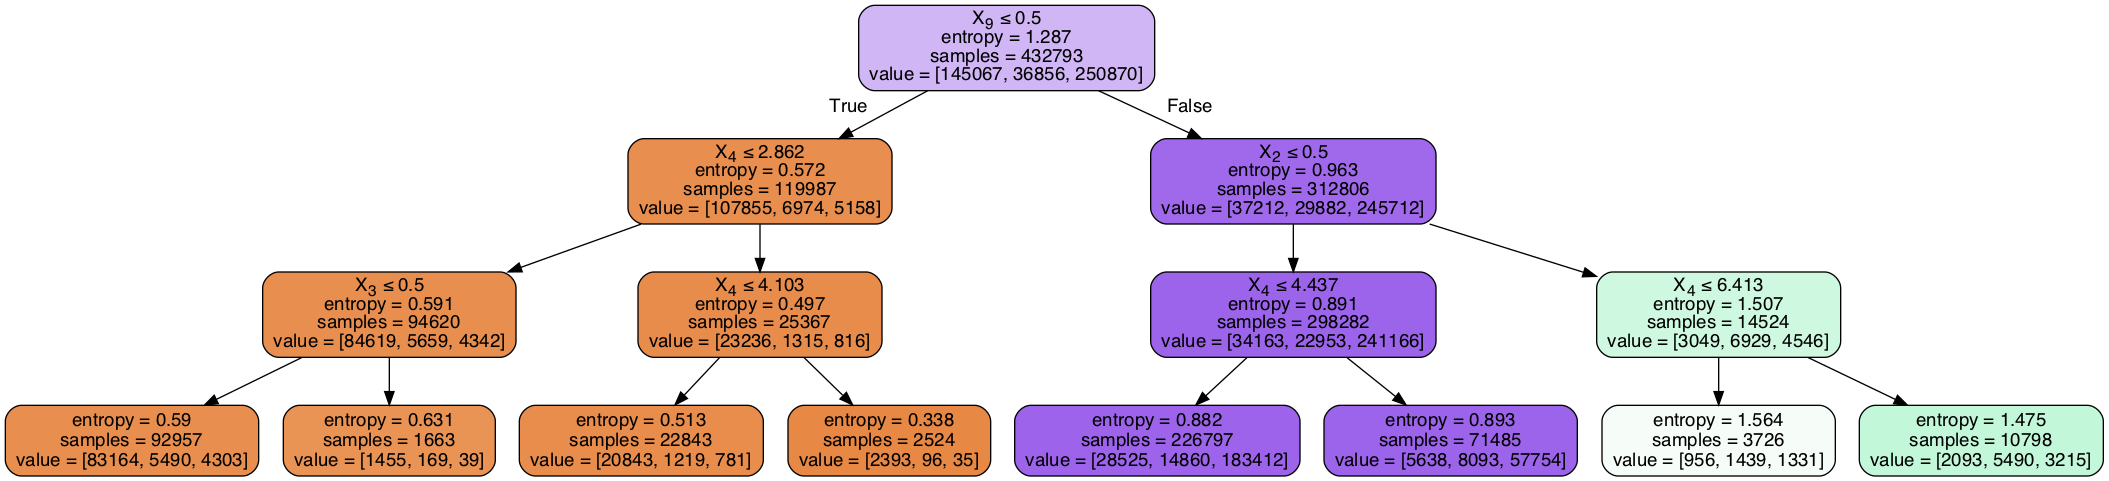

In [47]:
#視覺化決策樹分類圖
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [66]:
np.unique(x["投遞失敗次數"])

array([0, 1, 2])

In [68]:
x = ACC_frame[['保價','速度','包裹','快捷','weight','普通回執','掛號回執','限時掛號回執','快捷回執','無報值','法定紙幣報值','非法定紙幣報值','基隆市仁愛區','新北市板橋區','新北市三重區','宜蘭市','新竹市','桃園區','苗栗市','台中市中區','彰化市','南投市','嘉義市西區','雲林縣斗六市','台南市北區','高雄市新興區','馬公市','屏東市','台東市','花蓮市','投遞失敗次數']]
data_feature_name = x.columns[1:]
data_target_name = ['0','1','2']
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from IPython.display import Image

dot_tree = tree.export_graphviz(post_clf,out_file=None,feature_names=data_feature_name,class_names=data_target_name,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_tree)
img = Image(graph.create_png())
graph.write_png("out.png")

True

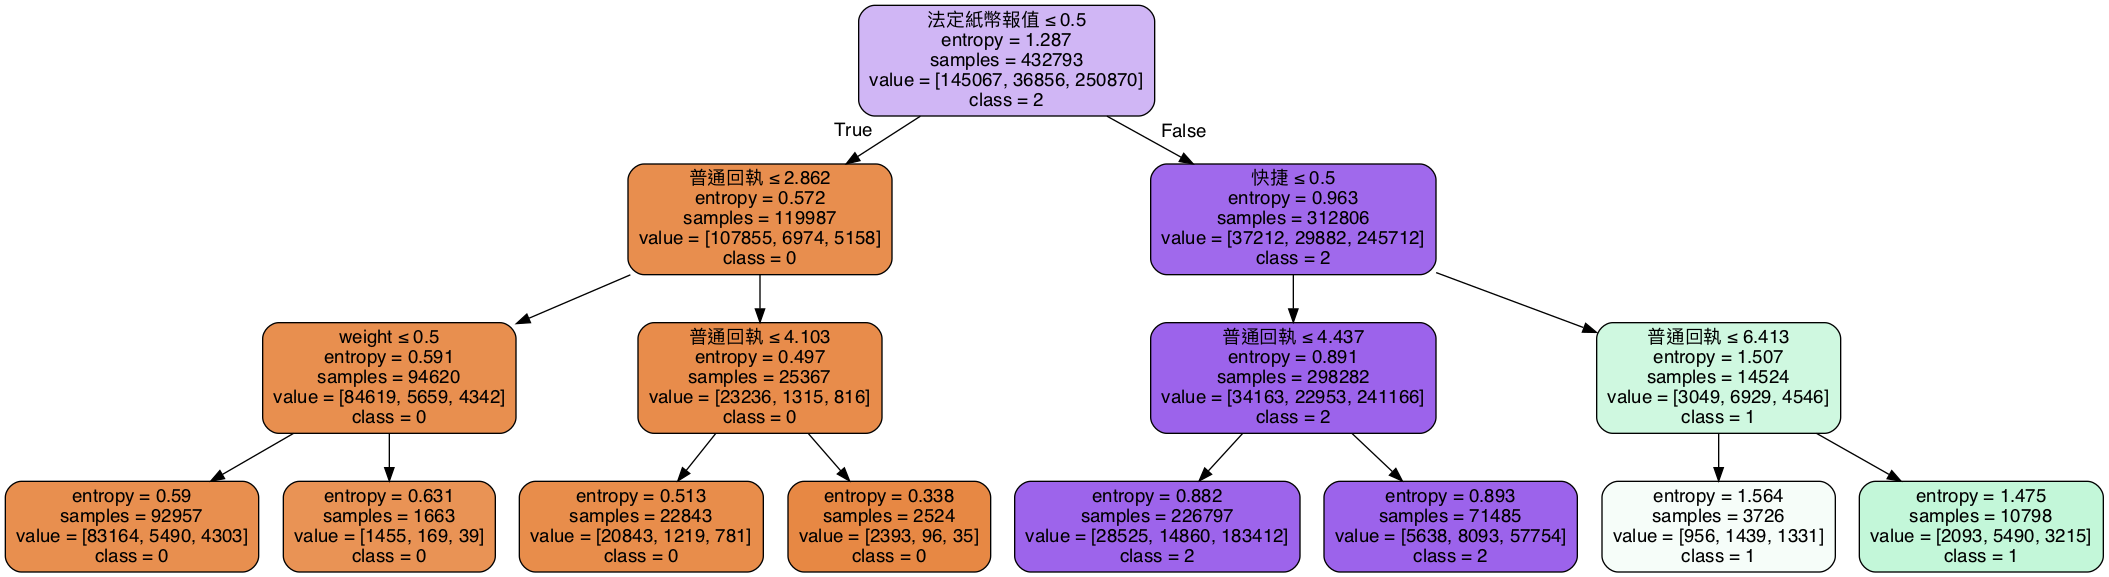

In [69]:
img

In [70]:
accuracy = metrics.accuracy_score(y_test, y_test_predicted)
print(accuracy)

0.8229281231804361


In [ ]:
l = [accuracy]
d = {"準確度" : l}
df1 = pd.DataFrame(d)
df1.to_csv("accuracy"+Q+".csv",encoding='utf-8')

In [29]:
count = ACC函件['狀態'].value_counts()
count = pd.DataFrame({'狀態':count.index, '數量':count.values})
count.to_csv("函件"+Q+".csv",encoding='utf-8')

In [30]:
count

,狀態,數量
0,2,307444
1,0,173780
2,1,36602


In [31]:
count = ACC包裹['狀態'].value_counts()
count = pd.DataFrame({'狀態':count.index, '數量':count.values})
count.to_csv("包裹"+Q+".csv",encoding='utf-8')

In [32]:
count

,狀態,數量
0,1,8710
1,2,5679
2,0,4533


In [33]:
count = ACC快捷['狀態'].value_counts()
count = pd.DataFrame({'狀態':count.index, '數量':count.values})
count.to_csv("快捷"+Q+".csv",encoding='utf-8')

In [35]:
count

,狀態,數量
0,0,3271
1,1,789
2,2,184
